# Better Generalization

### We can address underfitting by increasing the capacity of the model. Capacity refers to the ability of a model to fit a variety of functions; more capacity, means that a model can fit more types of functions for mapping inputs to outputs. Increasing the capacity of a model is easily achieved by changing the structure of the model, such as adding more layers and/or more nodes to layers. Because an underfit model is so easily addressed, it is more common to have an overfit model. An overfit model is easily diagnosed by monitoring the performance of the model during training by evaluating it on both a training dataset and on a holdout validation dataset. Graphing line plots of the performance of the model during training, called learning curves, will show a familiar pattern.

* Change network complexity by changing the network structure (number of weights).
* Change network complexity by changing the network parameters (values of weights).
### Calculate Weight Size
* Calculate the sum of the absolute values of the weights, called the L1 norm (or L1).
* Calculate the sum of the squared values of the weights, called the L2 norm (or L2).
#### L1 encourages weights to 0.0 if possible, resulting in more sparse weights (weights with more 0.0 values). L2 offers more nuance, both penalizing larger weights more severely, but resulting in less sparse weights. The use of L2 in linear and logistic regression is often referred to as Ridge Regression. This is useful to know when trying to develop an intuition for the penalty or examples of its usage.

## overfit mlp for the moons dataset

2024-04-12 11:27:28.585121: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Train: 1.000, Test: 0.914


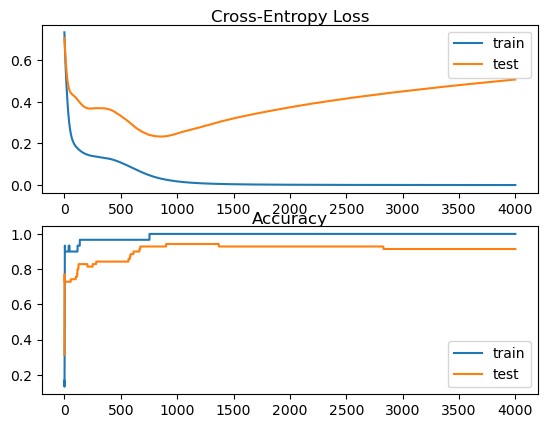

In [1]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0) # evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## MLP Model With Weight Regularization

Train: 1.000, Test: 0.943


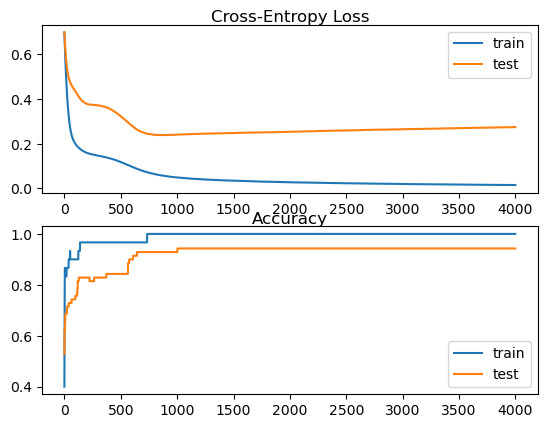

In [2]:

# mlp with weight regularization for the moons dataset
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001))) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0) # evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


## Grid Search Regularization Hyperparameter

Param: 0.100000, Train: 0.967, Test: 0.843
Param: 0.010000, Train: 1.000, Test: 0.929
Param: 0.001000, Train: 1.000, Test: 0.943
Param: 0.000100, Train: 1.000, Test: 0.929
Param: 0.000010, Train: 1.000, Test: 0.929
Param: 0.000001, Train: 1.000, Test: 0.914


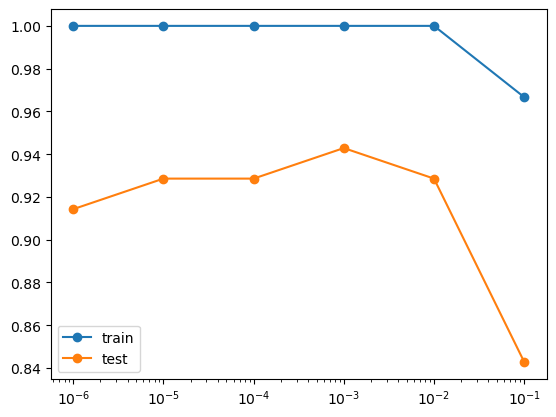

In [3]:
# grid search regularization values for moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
  # define model
  model = Sequential()
  model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param))) 
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit model
  model.fit(trainX, trainy, epochs=4000, verbose=0)
  # evaluate the model
  _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc)) 
  all_train.append(train_acc)
  all_test.append(test_acc)
# plot train and test means
pyplot.semilogx(values, all_train, label='train', marker='o') 
pyplot.semilogx(values, all_test, label='test', marker='o') 
pyplot.legend()
pyplot.show()


## Sparse Representations with Activity Regularization